# Logistic map
## Easy Level

ISU: 502552
N = 502552 mod 5 = 2

# Easy:

**Условие:**
$$ 
x_{n+1} = r x_n (1 - x_n) 
$$ 
Дано:
$$ 
\begin{cases} 
0 < x_0 < 1 \\ 
0 \le r \le 1 
\end{cases} 
$$

**Доказать:**
$$ 
\forall n \in \mathbb{N} \implies 0 < x_n < 1 
$$

---

#### Доказательство методом математической индукции

**1. База индукции (n=1)**

Докажу, что из условий следует $0 < x_1 < 1$.

*   **Докажу, что $x_1 > 0$:**
    Формула: $x_1 = r \cdot x_0 \cdot (1 - x_0)$. 
    По условию $r \ge 0$, $x_0 > 0$ и $(1-x_0) > 0$. 
    Произведение трех неотрицательных чисел (из которых как минимум два строго положительные) всегда положительно (или равно нулю, если $r=0$). По итогу, $x_1 \ge 0$. Буду считать $r>0$ для нетривиального случая, тогда $x_1 > 0$.

*   **Докажу, что $x_1 < 1$:**
    Рассмотрим часть выражения $x_0(1-x_0)$. Это парабола с ветвями вниз, ее максимум на интервале $(0,1)$ достигается в точке $x_0=0.5$ и равен $0.5 \cdot 0.5 = 0.25$. Значит, $x_0(1-x_0) \le 0.25$. 
    Так как по условию $r \le 1$, получаем: 
    $$ 
    x_1 = r \cdot x_0(1-x_0) \le 1 \cdot 0.25 = 0.25 
    $$ 
    Поскольку $0.25 < 1$, мы доказали, что $x_1 < 1$. 

Выполняется: $0 < x_1 < 1$.

**2. Шаг индукции**

**Предположение:** пусть, утверждение верно для некоторого шага $k$, то есть $0 < x_k < 1$.

**Докажу, что оно верно для $k+1$:** то есть, что $0 < x_{k+1} < 1$.
Доказательство полностью аналогично базовому шагу: 
$$ 
x_{k+1} = r \cdot \underbrace{x_k}_{>0} \cdot \underbrace{(1-x_k)}_{>0} \implies x_{k+1} > 0 
$$ 
$$ 
x_{k+1} = \underbrace{r}_{\le 1} \cdot \underbrace{x_k(1-x_k)}_{\le 0.25} \le 0.25 < 1 \implies x_{k+1} < 1 
$$ 
Выполняется.

**Вывод:** По принципу математической индукции, утверждение $0 < x_n < 1$ верно для всех натуральных $n$ при заданных условиях.

# Easy:
## Сделайте вывод: как параметр r влияет на поведение функции зависимости $x_{n}$ от $x_{n−1}$? Постройте эту функцию для нескольких различных значений r.

Рассмотрю, как параметр r влияет на функцию $x_{n+1} = f(x_n) = r x_n (1 - x_n)$.

Геометрически, эта функция представляет собой параболу $y = rx(1-x)$ с ветвями вниз. Параметр r выступает в роли множителя, который контролирует "высоту" этой параболы. Максимум функции достигается при $x=0.5$ и равен $f(0.5) = r/4$.

*   При малых r, парабола прижимается к оси абсцисс
*   С ростом r парабола становится выше и круче.
*   При дальнейшем увеличении r ($r > 3$) поведение системы усложняется, переходя к хаосу.

Построю графики для нескольких значений r

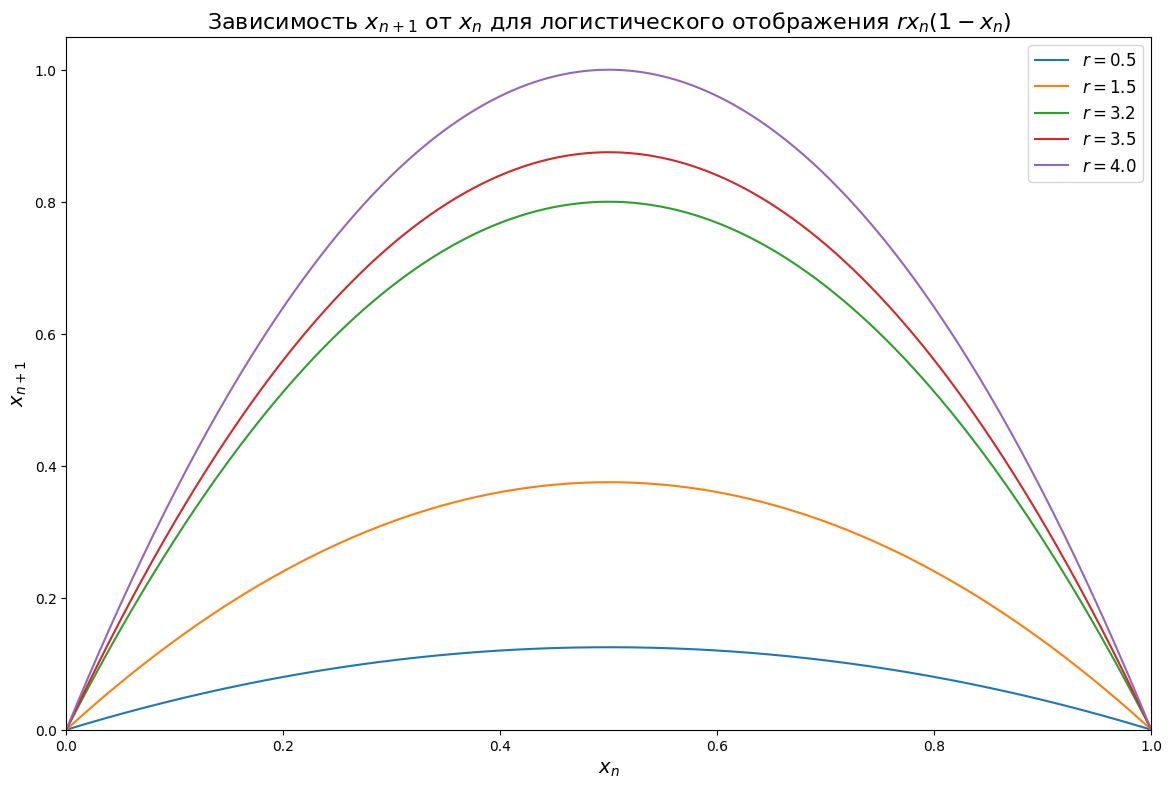

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

x = np.linspace(0, 1, 500)  # начало, конец, кол-во точек

r_values = [0.5, 1.5, 3.2, 3.5, 4.0]

plt.figure(figsize=(14, 9))  # размер графика

for r in r_values:
    y = logistic_map(x, r)  # массив из 500 элементов
    plt.plot(x, y, label=f'$r = {r}$')  # отрисовка графика


plt.title('Зависимость $x_{n+1}$ от $x_n$ для логистического отображения $rx_n(1-x_n)$', fontsize=16)
plt.xlabel('$x_n$', fontsize=14)
plt.ylabel('$x_{n+1}$', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()

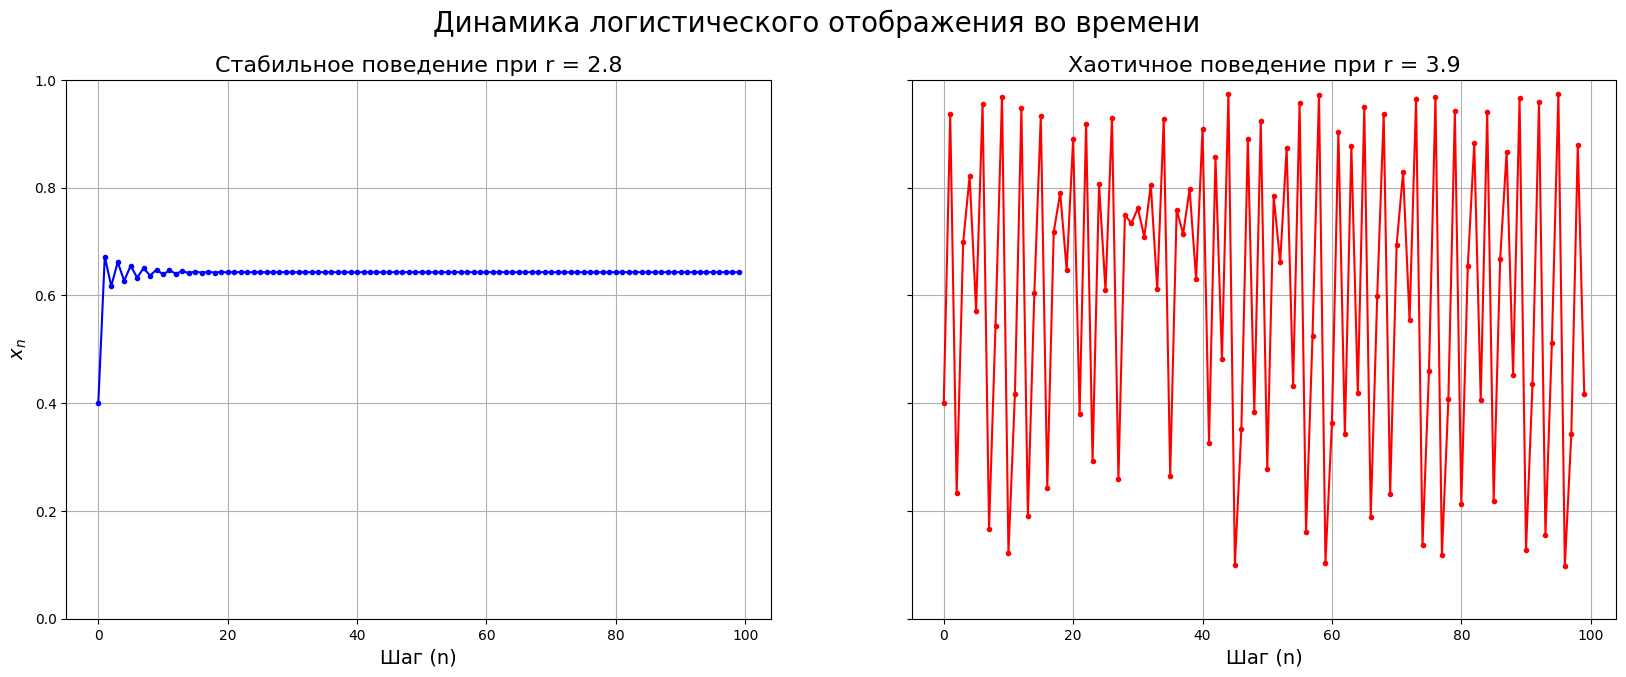

In [3]:
def generate_sequence(x0, r, num_steps):
    """Генерирует последовательность x_n для логистического отображения."""

    sequence = []
    x = x0
    for _ in range(num_steps):
        sequence.append(x)
        x = logistic_map(x, r)
    return sequence


x0 = 0.4

num_steps = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

r_stable = 2.8
sequence_stable = generate_sequence(x0, r_stable, num_steps)
ax1.plot(sequence_stable, '.-', color='blue')
ax1.set_title(f'Стабильное поведение при r = {r_stable}', fontsize=16)
ax1.set_xlabel('Шаг (n)', fontsize=14)
ax1.set_ylabel('$x_n$', fontsize=14)
ax1.set_ylim(0, 1)
ax1.grid(True)

r_chaotic = 3.9
sequence_chaotic = generate_sequence(x0, r_chaotic, num_steps)
ax2.plot(sequence_chaotic, '.-', color='red')
ax2.set_title(f'Хаотичное поведение при r = {r_chaotic}', fontsize=16)
ax2.set_xlabel('Шаг (n)', fontsize=14)
ax2.grid(True)

plt.suptitle('Динамика логистического отображения во времени', fontsize=20)
plt.show()

# Easy:
##  Сделайте вывод: как параметр r влияет на поведение функции зависимости xn от xn−1?
Эта функция, в отличие от параболы логистического отображения, является кубической и несимметричной. Ее максимум находится в точке $x = 1/3$. Это означает, что множитель $(1-x)^2$ начинает действовать сильнее при меньших значениях популяции, чем в стандартной модели.
## Постройте эту функцию для нескольких различных значений r. (уже сделано выше)



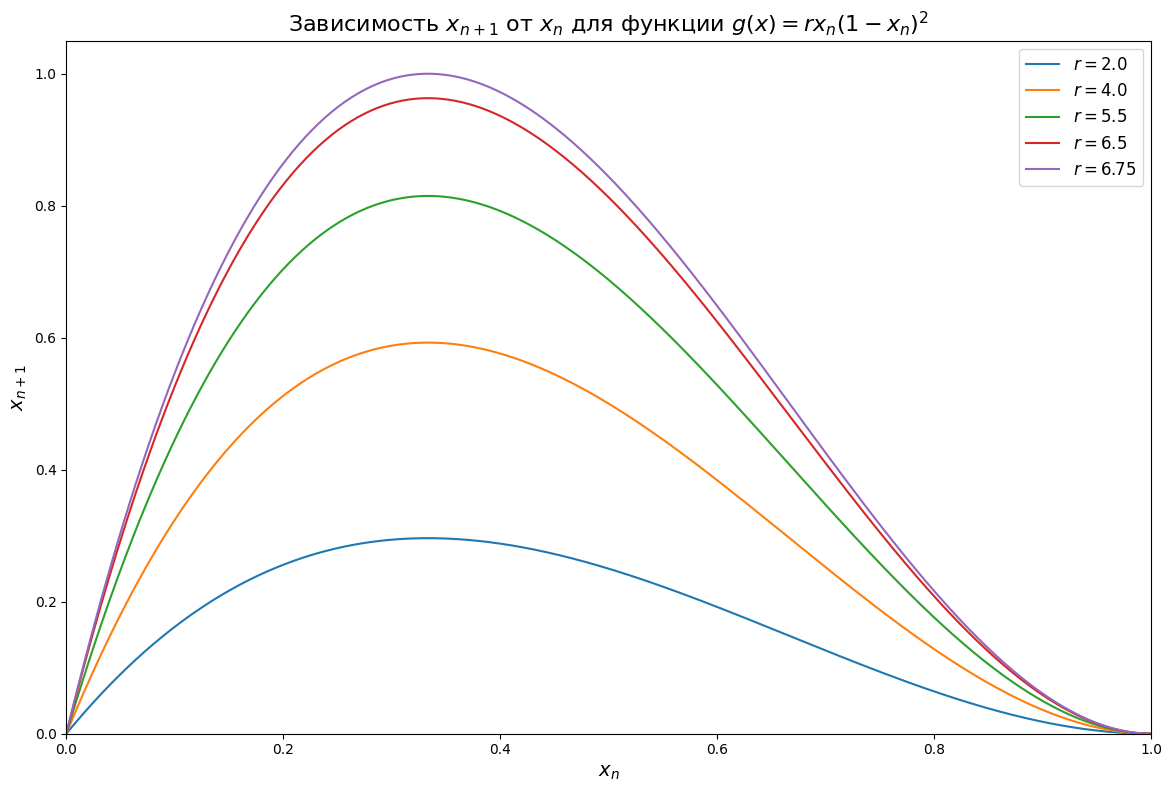

In [4]:
def variant_map(x, r):
    return r * x * (1 - x)**2

x = np.linspace(0, 1, 500)

r_values_variant = [2.0, 4.0, 5.5, 6.5, 6.75]

plt.figure(figsize=(14, 9))

for r in r_values_variant:
    y = variant_map(x, r)
    plt.plot(x, y, label=f'$r = {r}$')

plt.title('Зависимость $x_{n+1}$ от $x_n$ для функции $g(x) = rx_n(1-x_n)^2$', fontsize=16)
plt.xlabel('$x_n$', fontsize=14)
plt.ylabel('$x_{n+1}$', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()

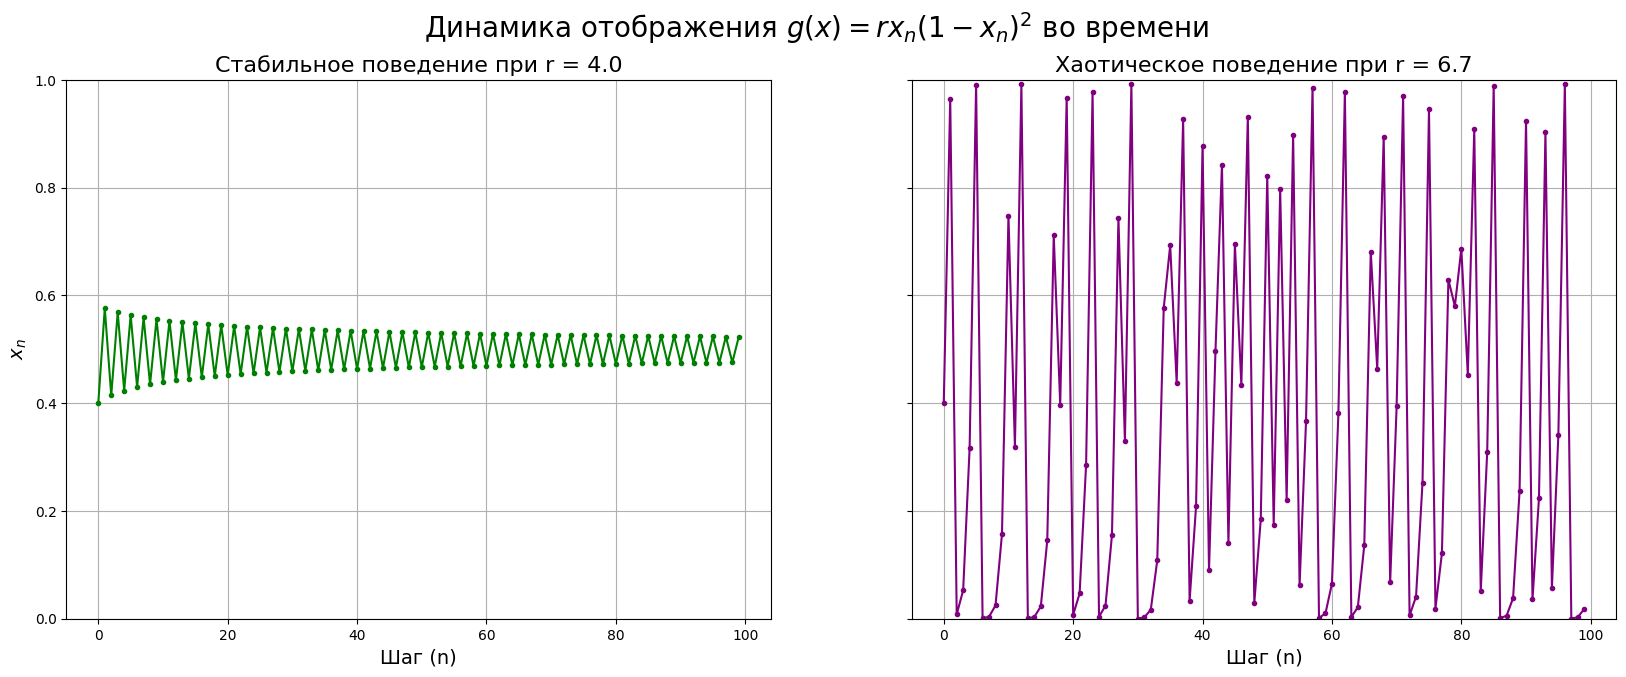

In [5]:
def generate_sequence_variant(x0, r, num_steps):
    """Генерирует последовательность x_n для отображения из варианта 2"""
    sequence = []
    x = x0
    for _ in range(num_steps):
        sequence.append(x)
        x = variant_map(x, r)
    return sequence

x0 = 0.4
num_steps = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

r_stable_variant = 4.0
sequence_stable = generate_sequence_variant(x0, r_stable_variant, num_steps)
ax1.plot(sequence_stable, '.-', color='green')
ax1.set_title(f'Стабильное поведение при r = {r_stable_variant}', fontsize=16)
ax1.set_xlabel('Шаг (n)', fontsize=14)
ax1.set_ylabel('$x_n$', fontsize=14)
ax1.set_ylim(0, 1)
ax1.grid(True)

r_chaotic_variant = 6.7
sequence_chaotic = generate_sequence_variant(x0, r_chaotic_variant, num_steps)
ax2.plot(sequence_chaotic, '.-', color='purple')
ax2.set_title(f'Хаотическое поведение при r = {r_chaotic_variant}', fontsize=16)
ax2.set_xlabel('Шаг (n)', fontsize=14)
ax2.grid(True)

plt.suptitle('Динамика отображения $g(x) = rx_n(1-x_n)^2$ во времени', fontsize=20)
plt.show()


# Easy:

## 1. Постройте графики зависимости xn от xn−1 для нескольких различных значений r.
(уже сделано выше)

## 2. Сделайте вывод о сходстве или различии поведения логистического отображения и точечного отображения из вашего варианта. Предположите: чем могут быть вызваны сходства/различия?
### Сходства:
1.  Общий принцип: Обе модели являются отображениями на отрезке [0,1], имеют один горб.
2.  Роль параметра r: В обеих системах r — это управляющий параметр, увеличение которого усложняет динамику системы.
3.  Нулевая точка: Обе функции имеют нулевую точку в x=0, соответствующую вымиранию популяции.

### Различия
1.  Форма функции: Логистическое отображение — симметричная парабола с максимумом в x=1/2. Функция из варианта — асимметричная кубическая кривая с максимумом в x=1/3.
2.  Интерпретация: Множитель $(1-x)^2$ в функции варианта можно интерпретировать как более сильный механизм подавления роста по сравнению с (1-x) в логистическом отображении. Например, это может быть моделью конкуренции не только за пищу, но и за территорию, где эффект перенаселения растет быстрее.
3.  Количественные характеристики: Из-за разной формы функций, значения r, при которых происходит переход к хаосу, будут отличаться. Диапазон r для отображения из варианта ([0, 6.75]) шире, чем для логистического ([0, 4]).

### Вывод
Сходства между отображениями обусловлены их принадлежностью к одному классу динамических систем, что порождает универсальные законы их поведения. Различия же кроются в конкретной математической форме, которая отражает разные допущения о моделируемом процессе (например, о силе внутривидовой конкуренции) и приводит к количественным различиям в динамике.